In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import nltk

# Download the Punkt tokenizer for sentence splitting
nltk.download('punkt')

# Download the stopwords corpus
nltk.download('stopwords')

# Optionally, download the WordNet lemmatizer (if you plan to use it later)
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/reduced_data_corpus.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now, read the CSV file directly from the path where you saved it
# Make sure to replace 'path_to_file' with the actual path to your CSV file
path_to_file = '/content/drive/My Drive/reduced_data_corpus.csv'
df = pd.read_csv(path_to_file)


Mounted at /content/drive


cnn              2000
indianexpress    2000
indiatimes       2000
nypost           2000
Name: channel_name, dtype: int64


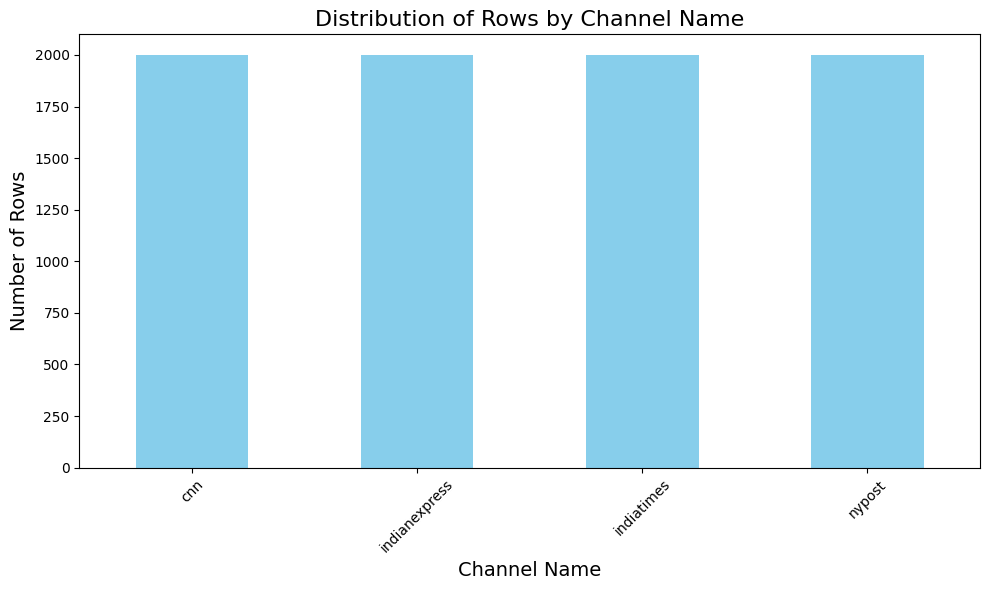

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'channel_name' is the column of interest.

# Calculate the distribution of rows among the channel_name classes
channel_distribution = df['channel_name'].value_counts()

# Print the distribution
print(channel_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Rows by Channel Name', fontsize=16)
plt.xlabel('Channel Name', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels to show them more clearly
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


In [ ]:
# Group by 'channel_name' and calculate min, max, and average length of text
text_stats = df.groupby('channel_name')['text_length'].agg(['min', 'max', 'mean']).reset_index()

# Rename the columns for clarity
text_stats.columns = ['Channel Name', 'Min Length', 'Max Length', 'Average Length']

# Optionally, round the average length to a desired number of decimal places
text_stats['Average Length'] = text_stats['Average Length'].round(2)

# Display the statistics
text_stats


,Channel Name,Min Length,Max Length,Average Length
0,cnn,249,2407,596.13
1,indianexpress,248,2393,450.32
2,indiatimes,242,2479,408.25
3,nypost,249,2430,648.64


In [ ]:
df = df.dropna(subset=['cleaned_title'])

In [ ]:
df.head(20)

,body,year,day,month_name,cleaned_title,channel_name,text_length,topic
0,Apple store headache Apple Stores one Steve Jo...,2014,17,January,Apple store headache,cnn,263,3
1,SXSW crowd swarms iPad 2 launch South African ...,2014,17,January,SXSW crowd swarm iPad launch,cnn,482,0
2,First earth Grover become singlename celebrity...,2014,19,January,tax pledge dangerous,cnn,417,3
3,Apartment construction slows sharply Housing s...,2014,17,January,Home building slows due weakness apartment con...,cnn,210,1
4,Time get creative helping unemployed back job ...,2014,16,January,Time get creative helping unemployed back job ...,cnn,397,1
5,trust income annuities NEW YORK Money know imm...,2014,19,January,Ask Expert income annuity safe bet,cnn,367,3
6,lonely top Apple said reputations take years m...,2014,16,January,lonely top Apple,cnn,313,3
7,Andrew Marquardt head bank research Evercore P...,2014,16,January,Investors bet big big bank,cnn,434,3
8,problem parties continue different ideas much ...,2014,22,January,Bush tax cut hurt debt committee,cnn,257,3
9,Debt committee Market reaction big unknown Tax...,2014,19,January,market react debt committee Good question,cnn,339,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import nltk

# Download the set of stop words if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np



In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install -U transformers


In [ ]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:


# Assuming 'df' is your DataFrame and 'combined_text' is the column with text
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1)  # 10% of data for validation

# Save the datasets to files
train_df['body'].to_csv('train_dataset.txt', header=False, index=False, sep='\t')
val_df['body'].to_csv('val_dataset.txt', header=False, index=False, sep='\t')

# Initialize tokenizer and model from pretrained GPT-2
tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Create a dataset and data collator for training
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="train_dataset.txt",
    block_size=128
)

# Create a dataset for validation
val_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="val_dataset.txt",
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",  # Directory for saving model
    overwrite_output_dir=True,      # Overwrite the content of the output directory
    num_train_epochs=5,            # Number of training epochs
    per_device_train_batch_size=4,  # Batch size for training
    per_device_eval_batch_size=4,   # Batch size for evaluation
    evaluation_strategy="epoch",    # Evaluate at the end of each epoch
    save_strategy="epoch",          # Save at the end of each epoch
    logging_steps=100,              # Log every X updates steps
    warmup_steps=500,               # Number of warmup steps for learning rate scheduler
    load_best_model_at_end=True,    # Load the best model at the end of training
)

# Initialize Trainer with both train and validation datasets
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

# Save the fine-tuned model
trainer.save_model("./gpt2-finetuned")

# Save the tokenizer
tokenizer.save_pretrained("./gpt2-finetuned")



/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.249400,3.054606
2,2.887700,3.031651
3,2.826500,3.028460


Epoch,Training Loss,Validation Loss
1,3.249400,3.054606
2,2.887700,3.031651
3,2.826500,3.028460
4,2.750700,3.032098
5,2.670300,3.041784


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


('./gpt2-finetuned/tokenizer_config.json',
 './gpt2-finetuned/special_tokens_map.json',
 './gpt2-finetuned/vocab.json',
 './gpt2-finetuned/merges.txt',
 './gpt2-finetuned/added_tokens.json',
 './gpt2-finetuned/tokenizer.json')

In [ ]:

# Load the fine-tuned model and tokenizer
model_path = "/content/gpt2-finetuned"  # or wherever you've saved your model
tokenizer = GPT2TokenizerFast.from_pretrained(model_path)
model = GPT2LMHeadModel.from_pretrained(model_path)

In [ ]:
import pandas as pd

# Initialize a dictionary to store the prompt and responses
responses_dict = {'prompt': [], 'response': []}

In [ ]:

# Encode the prompt
prompt = "Yankees"  # replace with your actual prompt
encoded_prompt = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")



# Generate text responses
# You might need to adjust the 'max_length' and 'num_return_sequences' based on your needs
output_sequences = model.generate(
    input_ids=encoded_prompt,
    max_length=200,  # maximum length of the sequence to be generated
    temperature=0.1,  # sampling temperature
    top_k=20,  # keep only top k candidates per step
    top_p=0.98,  # keep the top p cumulative probability
    repetition_penalty=1.5,  # repetition penalty. 1.0 means no penalty
    do_sample=True,  # use sampling
    num_return_sequences=3  # number of generated sequences
)

# Generate text responses
for generated_sequence_idx, generated_sequence in enumerate(output_sequences):
    print(f"Generated sequence {generated_sequence_idx + 1}:")
    decoded_sequence = tokenizer.decode(generated_sequence, skip_special_tokens=True)
    # Store the prompt and the corresponding response in the dictionary

    responses_dict['prompt'].append(prompt)
    responses_dict['response'].append(decoded_sequence)

    print(decoded_sequence)
    print()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated sequence 1:
Yankees, Yankees and Red Sox. The Yankees have been a bit of an embarrassment this year  they lost to the Dodgers, Tigers (and Royals) in the ALDS and lost to the Rays last season on home soil after losing to the Cardinals and Cardinals at Fenway Park. But the team has improved since then thanks largely due mostly because its more competitive than its past two seasons combined with better pitching from its young core players like Hiroki Kuroda, Masahiro Tanaka or Ivan Nova. It also is one reason why Alex Rodriguez was able to stay healthy despite his injury-riddled 2013 campaign that ended with him posting a career high tying 211 hits for second place behind only Ichiro Suzuki who hit.300/.400/2 years ago as well before being traded to Seattle for closer David Phelps. And the Yankees have won three straight since the All Star break. They are now 2-1 against the NL East while allowing just four runs per game over their past five

Generated sequence 2:
Yankees, wh

In [ ]:
# Convert the dictionary to a DataFrame
responses_df = pd.DataFrame(responses_dict)

# Display the DataFrame
print(responses_df)

               prompt                                           response
0              Indian  Indian, said the actor. I am very happy to b...
1              Indian  Indian,<U+0094> said a senior official. The go...
2              Indian  Indian,<U+0094> said a senior official. The go...
3               China  Indian, said the actor. I am very happy to b...
4               China  Indian,<U+0094> said a senior official. The go...
..                ...                                                ...
58  The Supreme Court  The Supreme Court has held that the state gove...
59  The Supreme Court  The Supreme Court has also asked the Centre to...
60            Yankees  Yankees, Yankees and Red Sox. The Yankees have...
61            Yankees  Yankees, who are in the midst of a three-game ...
62            Yankees  Yankees, who are in the midst of a five-game l...

[63 rows x 2 columns]


In [ ]:
import pandas as pd
from google.colab import files

# Assuming responses_df is your DataFrame containing the responses
responses_df.to_csv('generated_responses.csv', index=False)

# Download the file to your local system
files.download('generated_responses.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>